In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

df = pd.read_csv("Credit_scoring.csv",encoding = "UTF-8")
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [3]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29730
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [2]:
df["MonthlyIncome"] = df["MonthlyIncome"].interpolate(method='linear')
df["NumberOfDependents"] = df["NumberOfDependents"].interpolate(method='linear')

In [3]:
df.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           1
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      1
dtype: int64

In [4]:
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(0)
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(0)

<AxesSubplot: ylabel='Density'>

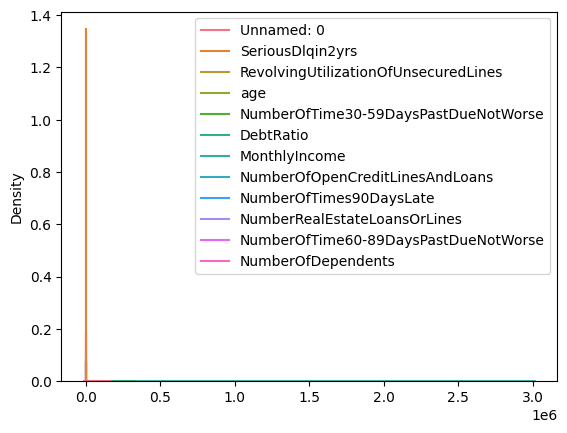

In [8]:
sns.kdeplot(data=df)

<AxesSubplot: >

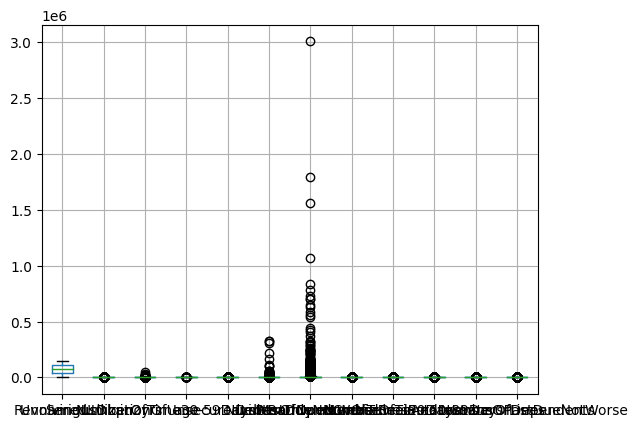

In [9]:
df.boxplot()

In [5]:
#Loại bỏ giá trị ngoại lai
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
df= df[~((df > upper_bound)|(df<lower_bound))]
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0.0,0.116951,27.0,0.0,NaN,0.0,2.0,0.0,0.0,0.0,0.0
1,10,0.0,0.189169,57.0,0.0,0.606291,NaN,9.0,0.0,4.0,0.0,2.0
2,11,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,12,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,13,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,149997,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149989,149998,0.0,0.246044,58.0,0.0,NaN,5650.0,18.0,0.0,1.0,0.0,0.0
149990,149999,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [11]:
#Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm,
#lấy ra khoảng giữ liệu của mỗi nhóm
for i in df.columns:
    #4 groups
    df[i + "4_groups"] = pd.qcut(df[i],4,duplicates ="drop")
    print("Number of elements: ", df[i + "4_groups"].value_counts())
    #5 groups
    df[i + "5_groups"] = pd.qcut(df[i],5,duplicates ="drop")
    print("Number of elements: ", df[i + "5_groups"].value_counts())
    #6 groups
    df[i + "6_groups"] = pd.qcut(df[i],6,duplicates ="drop")
    print("Number of elements: ", df[i + "6_groups"].value_counts())

Number of elements:  (8.999, 37506.75]        37498
(37506.75, 75004.5]      37498
(75004.5, 112502.25]     37498
(112502.25, 150000.0]    37498
Name: Unnamed: 04_groups, dtype: int64
Number of elements:  (8.999, 30007.2]        29999
(120001.8, 150000.0]    29999
(30007.2, 60005.4]      29998
(60005.4, 90003.6]      29998
(90003.6, 120001.8]     29998
Name: Unnamed: 05_groups, dtype: int64
Number of elements:  (8.999, 25007.5]        24999
(25007.5, 50006.0]      24999
(75004.5, 100003.0]     24999
(125001.5, 150000.0]    24999
(50006.0, 75004.5]      24998
(100003.0, 125001.5]    24998
Name: Unnamed: 06_groups, dtype: int64
Number of elements:  Series([], Name: SeriousDlqin2yrs4_groups, dtype: int64)
Number of elements:  Series([], Name: SeriousDlqin2yrs5_groups, dtype: int64)
Number of elements:  Series([], Name: SeriousDlqin2yrs6_groups, dtype: int64)
Number of elements:  (-0.001, 0.0296]    37308
(0.0296, 0.152]     37307
(0.152, 0.549]      37307
(0.549, 1.352]      37307
Name: R

In [12]:
#Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo
#các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.
bins = [0,30,40,50,80,150]
df["age"] = pd.cut(df["age"],bins,labels = ["children","teenage","adolescence", "middel age","senior citizen"] )
df["age"].value_counts()


middel age        74928
adolescence       35035
teenage           24336
children          10756
senior citizen     4891
Name: age, dtype: int64

In [8]:
bins = [0,30,40,50,80,150]
df["MonthlyIncome"] = pd.cut(df["age"],bins,labels=["newbie","officer","leader", "manager","director"])
df["MonthlyIncome"].value_counts()

manager     74928
leader      35035
officer     24336
newbie      10756
director     4891
Name: MonthlyIncome, dtype: int64